In [38]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a62c06f1-f455-49b3-807a-2084f301fb72',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-09-18T23:20:10.220Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9496}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12370, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [39]:
type(data)

dict

In [40]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [42]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12370,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19922840.00000,19922840.00000,False,NaN,1,NaN,NaN,None,2025-09-18T23:19:00.000Z,116696.75046,49993182160.79033,-18.24580,-0.49369,-0.05511,1.14916,3.34972,-0.60820,13.13825,2324930687929.76758,56.86810,2450631759655.00000,None,2025-09-18T23:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
1,1027,Ethereum,ETH,ethereum,10771,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120704240.31021,120704240.31021,True,NaN,2,NaN,NaN,None,2025-09-18T23:18:00.000Z,4576.62100,34325737323.53422,-23.54110,-0.31114,-0.45970,2.51415,11.15541,21.95755,91.11282,552417560603.19226,13.51290,552417560603.18994,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
2,52,XRP,XRP,xrp,1708,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59777241479.00000,99985800180.00000,False,NaN,3,NaN,NaN,None,2025-09-18T23:18:00.000Z,3.06980,6480558856.70913,3.32930,-0.28209,-0.70001,1.02586,6.45658,-10.96433,45.31532,183504107215.74045,4.48980,306979885112.64001,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
3,825,Tether USDt,USDT,tether,148134,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,171121826173.73566,175071778009.35733,True,NaN,4,NaN,NaN,None,2025-09-18T23:18:00.000Z,1.00040,145120420191.14450,-5.52030,0.01217,-0.01027,0.02516,0.04362,0.00699,0.01146,171190219559.39621,4.18820,175141750098.25000,None,2025-09-18T23:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-19 02:20:31.488874
4,1839,BNB,BNB,bnb,2728,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139186741.77000,139186741.77000,False,NaN,5,NaN,NaN,None,2025-09-18T23:18:00.000Z,981.69362,3823655105.90871,7.91630,-0.47579,-0.70550,8.71314,17.99874,29.79635,53.29015,136638736521.94466,3.34290,136638736521.94000,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
5,5426,Solana,SOL,solana,1003,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,543034506.16040,610035537.52603,True,NaN,6,525236893.30000,129502271867.19916,None,2025-09-18T23:18:00.000Z,246.55974,9364775722.36735,-8.87380,-0.30671,0.49331,7.89290,38.09821,36.72724,77.13435,133890446667.24712,3.27560,150410203542.63000,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
6,3408,USDC,USDC,usd-coin,31884,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,74382498536.34665,74382498536.34665,False,NaN,7,60901219650.23000,60895443914.51237,None,2025-09-18T23:18:00.000Z,0.99991,28595293755.70820,21.86510,0.01698,-0.01181,0.01584,0.00274,0.01298,-0.01900,74375444266.23463,1.81930,74375444266.23000,None,2025-09-18T23:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-19 02:20:31.488874
7,74,Dogecoin,DOGE,dogecoin,1308,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150998246383.70523,150998246383.70523,True,NaN,8,NaN,NaN,None,2025-09-18T23:18:00.000Z,0.27749,4534953326.30747,-4.01010,-0.72425,-1.57106,8.33237,31.16886,1.03054,71.57137,41901249438.43512,

In [43]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'a62c06f1-f455-49b3-807a-2084f301fb72',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None  

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    return df


In [44]:
import os 
from time import sleep

df_list = []  

for i in range(333):
    df2 = api_runner()   
    if df2 is not None:  
        df_list.append(df2)
        print("API Runner completed")
        
        if not os.path.isfile(r'C:\Users\MAXNET\Desktop\Python Scripts\API.csv'):
            df2.to_csv(r'C:\Users\MAXNET\Desktop\Python Scripts\API.csv', index=False, header=True)
        else:
            df2.to_csv(r'C:\Users\MAXNET\Desktop\Python Scripts\API.csv', mode='a', index=False, header=False)
    
    sleep(60)  

df = pd.concat(df_list, ignore_index=True)

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [45]:
df00 = pd.read_csv(r'C:\Users\MAXNET\Desktop\Python Scripts\API.csv')
df00

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12368,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19922396.00000,19922396.0,False,NaN,1.00000,NaN,NaN,NaN,2025-09-18T01:16:00.000Z,116579.27440,63841838000.81783,39.89480,0.23085,-0.10972,2.18724,0.07033,-1.25054,11.49545,2322538469950.13330,56.89350,2448164762358.54004,NaN,2025-09-18T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-18 04:18:11.258359
1,1,1027,Ethereum,ETH,ethereum,10759,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120704240.31021,120704240.31020737,True,NaN,2.00000,NaN,NaN,NaN,2025-09-18T01:17:00.000Z,4605.85770,47800319773.78963,51.38540,-0.02723,2.05957,5.30332,6.15566,27.57890,82.54596,555946554799.25049,13.61580,555946554799.25000,NaN,2025-09-18T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-18 04:18:11.258359
2,2,52,XRP,XRP,xrp,1707,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59777241479.00000,99985800180.0,False,NaN,3.00000,NaN,NaN,NaN,2025-09-18T01:16:00.000Z,3.08447,6656287186.51829,41.41170,-0.31471,1.43143,2.97448,0.35099,-10.39236,42.24599,184381378758.20889,4.51740,308447452903.92999,NaN,2025-09-18T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-18 04:18:11.258359
3,3,825,Tether USDt,USDT,tether,147885,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,170950286174.40594,174721778009.13943,True,NaN,4.00000,NaN,NaN,NaN,2025-09-18T01:16:00.000Z,1.00048,161282293839.66113,40.00950,0.01104,0.00349,0.02791,0.01188,0.01094,0.03070,171031992049.64911,4.19100,174805286473.01001,NaN,2025-09-18T01:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-18 04:18:11.258359
4,4,1839,BNB,BNB,bnb,2726,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139186810.37000,139186810.37,False,NaN,5.00000,NaN,NaN,NaN,2025-09-18T01:16:00.000Z,986.63858,3631307114.65166,13.83640,-0.43537,2.86295,10.53062,16.20212,34.02103,53.14123,137327077014.64967,3.36510,137327077014.64999,NaN,2025-09-18T01:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-18 04:18:11.258359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,32196,Hyperliquid,HYPE,hyperliquid,155,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1000000000.0,333928180.00000,999993930.00000,False,NaN,11.00000,333931719.00000,19409000360.94825,NaN,2025-09-18T23:22:00.000Z,58.1226617796923,397556952.75434,7.74100,0.01263,0.75070,2.32242,40.58937,26.23499,74.49063,19408794664.84821,0.47500,58122661779.69000,NaN,2025-09-18T23:22:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-09-19 02:22:50.596149,NaN
871,1975,Chainlink,LINK,chainlink,2096,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'interoperability', 'orac...",1000000000.0,678099970.45279,1000000000.00000,False,NaN,12.00000,NaN,NaN,NaN,2025-09-18T23:22:00.000Z,24.581724402938665,967668453.82859,-15.98970,0.02673,2.30011,0.60741,3.65281,27.05702,97.89673,16668866591.31126,0.40810,24581724402.94000,NaN,2025-09-18T23:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-09-19 02:22:50.596149,NaN
872,5805,Avalanche,AVAX,avalanche,975,20

In [46]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12370,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19922840.00000,19922840.00000,False,NaN,1,NaN,NaN,None,2025-09-18T23:19:00.000Z,116696.75046,49993182160.79033,-18.24580,-0.49369,-0.05511,1.14916,3.34972,-0.60820,13.13825,2324930687929.76758,56.86810,2450631759655.00000,None,2025-09-18T23:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
1,1027,Ethereum,ETH,ethereum,10771,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120704240.31021,120704240.31021,True,NaN,2,NaN,NaN,None,2025-09-18T23:18:00.000Z,4576.62100,34325737323.53422,-23.54110,-0.31114,-0.45970,2.51415,11.15541,21.95755,91.11282,552417560603.19226,13.51290,552417560603.18994,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
2,52,XRP,XRP,xrp,1708,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59777241479.00000,99985800180.00000,False,NaN,3,NaN,NaN,None,2025-09-18T23:18:00.000Z,3.06980,6480558856.70913,3.32930,-0.28209,-0.70001,1.02586,6.45658,-10.96433,45.31532,183504107215.74045,4.48980,306979885112.64001,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
3,825,Tether USDt,USDT,tether,148134,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,171121826173.73566,175071778009.35733,True,NaN,4,NaN,NaN,None,2025-09-18T23:18:00.000Z,1.00040,145120420191.14450,-5.52030,0.01217,-0.01027,0.02516,0.04362,0.00699,0.01146,171190219559.39621,4.18820,175141750098.25000,None,2025-09-18T23:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-09-19 02:20:31.488874
4,1839,BNB,BNB,bnb,2728,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139186741.77000,139186741.77000,False,NaN,5,NaN,NaN,None,2025-09-18T23:18:00.000Z,981.69362,3823655105.90871,7.91630,-0.47579,-0.70550,8.71314,17.99874,29.79635,53.29015,136638736521.94466,3.34290,136638736521.94000,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
5,5426,Solana,SOL,solana,1003,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,543034506.16040,610035537.52603,True,NaN,6,525236893.30000,129502271867.19916,None,2025-09-18T23:18:00.000Z,246.55974,9364775722.36735,-8.87380,-0.30671,0.49331,7.89290,38.09821,36.72724,77.13435,133890446667.24712,3.27560,150410203542.63000,None,2025-09-18T23:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-09-19 02:20:31.488874
6,3408,USDC,USDC,usd-coin,31884,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,74382498536.34665,74382498536.34665,False,NaN,7,60901219650.23000,60895443914.51237,None,2025-09-18T23:18:00.000Z,0.99991,28595293755.70820,21.86510,0.01698,-0.01181,0.01584,0.00274,0.01298,-0.01900,74375444266.23463,1.81930,74375444266.23000,None,2025-09-18T23:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-09-19 02:20:31.488874
7,74,Dogecoin,DOGE,dogecoin,1308,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150998246383.70523,150998246383.70523,True,NaN,8,NaN,NaN,None,2025-09-18T23:18:00.000Z,0.27749,4534953326.30747,-4.01010,-0.72425,-1.57106,8.33237,31.16886,1.03054,71.57137,41901249438.43512,

In [48]:
df01 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df01

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.49369,-0.05511,1.14916,3.34972,-0.60820,13.13825
Ethereum,-0.31114,-0.45970,2.51415,11.15541,21.95755,91.11282
XRP,-0.28209,-0.70001,1.02586,6.45658,-10.96433,45.31532
Tether USDt,0.01217,-0.01027,0.02516,0.04362,0.00699,0.01146
BNB,-0.47579,-0.70550,8.71314,17.99874,29.79635,53.29015
Solana,-0.30671,0.49331,7.89290,38.09821,36.72724,77.13435
USDC,0.01698,-0.01181,0.01584,0.00274,0.01298,-0.01900
Dogecoin,-0.72425,-1.57106,8.33237,31.16886,1.03054,71.57137
TRON,-0.12056,1.76283,0.95804,0.09274,11.61233,28.14479


In [49]:
df02 = df01.stack()
df02

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.49369
         quote.USD.percent_change_24h   -0.05511
         quote.USD.percent_change_7d     1.14916
         quote.USD.percent_change_30d    3.34972
         quote.USD.percent_change_60d   -0.60820
                                          ...   
Sui      quote.USD.percent_change_24h    2.51547
         quote.USD.percent_change_7d     5.72660
         quote.USD.percent_change_30d   12.49357
         quote.USD.percent_change_60d   -0.16266
         quote.USD.percent_change_90d   43.71076
Length: 90, dtype: float64

In [50]:
df03 = df02.to_frame(name='values')
df03

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.49369
        quote.USD.percent_change_24h -0.05511
        quote.USD.percent_change_7d   1.14916
        quote.USD.percent_change_30d  3.34972
        quote.USD.percent_change_60d -0.60820
...                                       ...
Sui     quote.USD.percent_change_24h  2.51547
        quote.USD.percent_change_7d   5.72660
        quote.USD.percent_change_30d 12.49357
        quote.USD.percent_change_60d -0.16266
        quote.USD.percent_change_90d 43.71076

[90 rows x 1 columns]

In [51]:
df03.count()

values    90
dtype: int64

In [52]:
index = pd.Index(range(90))

df04 = df03.reset_index()
df04

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49369
1,Bitcoin,quote.USD.percent_change_24h,-0.05511
2,Bitcoin,quote.USD.percent_change_7d,1.14916
3,Bitcoin,quote.USD.percent_change_30d,3.34972
4,Bitcoin,quote.USD.percent_change_60d,-0.60820
...,...,...,...
85,Sui,quote.USD.percent_change_24h,2.51547
86,Sui,quote.USD.percent_change_7d,5.72660
87,Sui,quote.USD.percent_change_30d,12.49357
88,Sui,quote.USD.percent_change_60d,-0.16266


In [53]:
df05 = df04.rename(columns={'level_1': 'percent_change'})
df05

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49369
1,Bitcoin,quote.USD.percent_change_24h,-0.05511
2,Bitcoin,quote.USD.percent_change_7d,1.14916
3,Bitcoin,quote.USD.percent_change_30d,3.34972
4,Bitcoin,quote.USD.percent_change_60d,-0.60820
...,...,...,...
85,Sui,quote.USD.percent_change_24h,2.51547
86,Sui,quote.USD.percent_change_7d,5.72660
87,Sui,quote.USD.percent_change_30d,12.49357
88,Sui,quote.USD.percent_change_60d,-0.16266


In [58]:
df05['percent_change'] = df05['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df05

,name,percent_change,values
0,Bitcoin,1h,-0.49369
1,Bitcoin,24h,-0.05511
2,Bitcoin,7d,1.14916
3,Bitcoin,30d,3.34972
4,Bitcoin,60d,-0.60820
...,...,...,...
85,Sui,24h,2.51547
86,Sui,7d,5.72660
87,Sui,30d,12.49357
88,Sui,60d,-0.16266


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

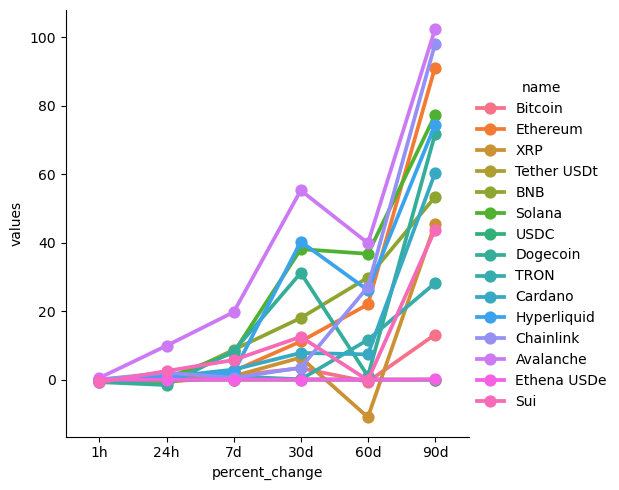

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df05, kind='point')
